# Multi-modal-Emotion-Analysis-on-COVID-19

## 1. Getting Data Ready


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import re

In [2]:
import pandas as pd
df = pd.read_csv("combine-final.csv",encoding='latin1')
df.head()

,S.No.,Tweet Posted Time (UTC),tweets,Tweet Location
0,1.0,01-03-2020,Why .Indians to prayer Iran a polluted http://...,Bihar
1,2.0,01-03-2020,Even death is âMade in Chinaâ now #CoronaV...,Goa
2,3.0,01-03-2020,One of the most widely read published stories...,Goa
3,4.0,01-03-2020,Hahahh RAW mission in Iran is failed due to C...,Punjab
4,5.0,01-03-2020,#BreakingNews: in show @sawaalwithamber on @SA...,Punjab


In [3]:
df.tail()

,S.No.,Tweet Posted Time (UTC),tweets,Tweet Location
814888,814883.0,09-06-2020,How to use contact lenses safely during these ...,Dehradun
814889,814884.0,09-06-2020,Digital Justice System in India: Overview & Re...,Dehradun
814890,814885.0,09-06-2020,#IndiaFightsCorona Stigma around #COVID19 can ...,Dehradun
814891,814886.0,09-06-2020,These 8 steps will help revive #indianeconomy ...,Dehradun
814892,814887.0,09-06-2020,Continuous improvement in COVID-19 doubling r...,Dehradun


In [4]:
df['tweets']

0         Why .Indians to prayer Iran a polluted http://...
1         Even death is âMade in Chinaâ now #CoronaV...
2         One of the most widely read  published stories...
3         Hahahh  RAW mission in Iran is failed due to C...
4         #BreakingNews: in show @sawaalwithamber on @SA...
                                ...                        
814888    How to use contact lenses safely during these ...
814889    Digital Justice System in India: Overview & Re...
814890    #IndiaFightsCorona Stigma around #COVID19 can ...
814891    These 8 steps will help revive #indianeconomy ...
814892    Continuous improvement in COVID-19 doubling  r...
Name: tweets, Length: 814893, dtype: object

In [5]:
df.describe

<bound method NDFrame.describe of            S.No. Tweet Posted Time (UTC)  \
0            1.0              01-03-2020   
1            2.0              01-03-2020   
2            3.0              01-03-2020   
3            4.0              01-03-2020   
4            5.0              01-03-2020   
...          ...                     ...   
814888  814883.0              09-06-2020   
814889  814884.0              09-06-2020   
814890  814885.0              09-06-2020   
814891  814886.0              09-06-2020   
814892  814887.0              09-06-2020   

                                                   tweets Tweet Location  
0       Why .Indians to prayer Iran a polluted http://...          Bihar  
1       Even death is âMade in Chinaâ now #CoronaV...            Goa  
2       One of the most widely read  published stories...            Goa  
3       Hahahh  RAW mission in Iran is failed due to C...         Punjab  
4       #BreakingNews: in show @sawaalwithamber on @SA...     

In [6]:
stop = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [7]:
import string
#lowerCase
df['tweets'] = df['tweets'].map(lambda x:str(x).lower())

#user mention removes
df['tweets'] = df['tweets'].str.replace(r'@\S+', '')

#removes retweets & cc
df['tweets'] = df['tweets'].str.replace(r'rt|cc', '')

#remove special characters except [a-zA-Z]
df['tweets'] = df['tweets'].map(lambda x:re.sub('[^a-zA-Z]',' ',str(x)))

#remove link starts with https
df['tweets'] = df['tweets'].map(lambda x:re.sub('http.*','',str(x)))

df['tweets'] = df['tweets'].str.replace(r'(https|http)?:\/(\w|\.|\/|\?|\=|\&|\%)*\b','')

#punctuation
df['tweets'] = df['tweets'].str.replace('[{}]'.format(string.punctuation), '')


df.head()
df


,S.No.,Tweet Posted Time (UTC),tweets,Tweet Location
0,1.0,01-03-2020,why indians to prayer iran a polluted,Bihar
1,2.0,01-03-2020,even death is made in china now coronav...,Goa
2,3.0,01-03-2020,one of the most widely read published stories...,Goa
3,4.0,01-03-2020,hahahh raw mission in iran is failed due to c...,Punjab
4,5.0,01-03-2020,breakingnews in show on special assistant ...,Punjab
...,...,...,...,...
814888,814883.0,09-06-2020,how to use contact lenses safely during these ...,Dehradun
814889,814884.0,09-06-2020,digital justice system in india overview re...,Dehradun
814890,814885.0,09-06-2020,indiafightscorona stigma around covid can ...,Dehradun
814891,814886.0,09-06-2020,these steps will help revive indianeconomy ...,Dehradun


In [8]:
# it include stopwords
tweet_words = []
for i in df['tweets']:
    for j in i.split():
        tweet_words.append(j)
print(tweet_words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
# here we remove stopwords
fwords = []
for i in tweet_words:
    if i not in stop:
        fwords.append(i)
# repetition removed and stored in swords
swords=list(set(fwords))


In [10]:
cleaned_tweets = df['tweets']

  
# printing the original list  
print ("The original list is : " + str(cleaned_tweets)) 
  
# using zip() + split() + list comprehension 
# for Bigram formation 
res = [i for j in cleaned_tweets  
       for i in zip(j.split(" ")[:-1], j.split(" ")[1:])] 
  
# printing result 
print ("The formed bigrams are : " + str(res)) 


The original list is : 0                   why  indians to prayer iran a polluted 
1         even death is    made in china    now  coronav...
2         one of the most widely read  published stories...
3         hahahh  raw mission in iran is failed due to c...
4          breakingnews  in show  on  special assistant ...
                                ...                        
814888    how to use contact lenses safely during these ...
814889    digital justice system in india  overview   re...
814890     indiafightscorona stigma around  covid   can ...
814891    these   steps will help revive  indianeconomy ...
814892    continuous improvement in covid    doubling  r...
Name: tweets, Length: 814893, dtype: object


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# 2. WordCloud

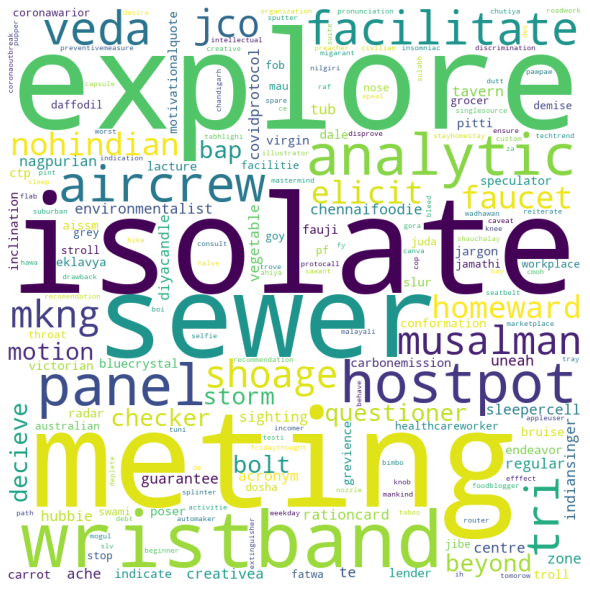

In [11]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in swords: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()


# 3. Getting NRC Dataframe Ready!

In [12]:
import pandas as pd
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], sep='\t')
emolex_df= emolex_df[emolex_df['association']==1]
emolex_df.head()

,word,emotion,association
40,abacus,trust,1.0
44,abandon,fear,1.0
46,abandon,negative,1.0
48,abandon,sadness,1.0
51,abandoned,anger,1.0


In [13]:
emolex_df.emotion.unique()

array(['trust', 'fear', 'negative', 'sadness', 'anger', 'surprise',
       'positive', 'disgust', 'joy', 'anticipation'], dtype=object)

In [14]:
emolex_df.emotion.value_counts()

negative        3324
positive        2312
fear            1476
anger           1247
trust           1231
sadness         1191
disgust         1058
anticipation     839
joy              689
surprise         534
Name: emotion, dtype: int64

In [15]:
emolex_df[emolex_df.association == 1].emotion.value_counts()

negative        3324
positive        2312
fear            1476
anger           1247
trust           1231
sadness         1191
disgust         1058
anticipation     839
joy              689
surprise         534
Name: emotion, dtype: int64

In [16]:
emolex_df[(emolex_df.association == 1) & (emolex_df.emotion == 'anger')].word

51          abandoned
61        abandonment
191             abhor
201         abhorrent
291           abolish
             ...     
141241       wrongful
141251        wrongly
141491           yell
141521           yelp
141661          youth
Name: word, Length: 1247, dtype: object

In [17]:
emolex_words = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_words.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,abacus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,abandon,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
2,abandoned,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
3,abandonment,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN
4,abba,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [18]:
# If you didn't reset_index you could do this more easily
# by doing emolex_words.loc['charitable']
emolex_words[emolex_words.word == 'charitable']

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
910,charitable,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0


In [19]:
emolex_words[emolex_words.anger==1].head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
2,abandoned,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
3,abandonment,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN
9,abhor,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
10,abhorrent,1.0,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN
14,abolish,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [20]:
emolex_words[(emolex_words.joy == 1) & (emolex_words.negative == 1)].head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
35,abundance,NaN,1.0,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0
495,balm,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
676,boisterous,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN
878,celebrity,1.0,1.0,1.0,NaN,1.0,1.0,1.0,NaN,1.0,1.0
913,charmed,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN


In [21]:
# Angry words
emolex_words[emolex_words.anger == 1].word

2         abandoned
3       abandonment
9             abhor
10        abhorrent
14          abolish
           ...     
6449       wrongful
6450        wrongly
6457           yell
6459           yelp
6462          youth
Name: word, Length: 1247, dtype: object

In [22]:
emolex_words

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,abacus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,abandon,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
2,abandoned,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN
3,abandonment,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN
4,abba,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6463,zany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
6464,zeal,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0
6465,zealous,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0
6466,zest,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0


In [23]:
emotions = ['anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust']
for i in emotions:
    emolex_words[i].fillna(0,inplace=True)

In [24]:
# NRC Dataframe Ready
emolex_words

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,abacus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,abandon,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,abandoned,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,abandonment,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,abba,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6463,zany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6464,zeal,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
6465,zealous,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6466,zest,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [25]:
emotion_anger = list(emolex_words['anger'])
emotion_anticipation = list(emolex_words['anticipation'])
emotion_disgust = list(emolex_words['disgust'])
emotion_fear = list(emolex_words['fear'])
emotion_joy = list(emolex_words['joy'])
emotion_negative = list(emolex_words['negative'])
emotion_positive = list(emolex_words['positive'])
emotion_sadness = list(emolex_words['sadness'])
emotion_surprise = list(emolex_words['surprise'])
emotion_trust = list(emolex_words['trust'])


In [26]:
emotion_word = list(emolex_words['word'])

# 4. Aspect Category and Aspect Terms

In [27]:
# Curated Aspect Category and Aspect Terms

nature = [
          'environment','pollution','polluted','pollute','sky','stars','day','night','surrounding','nature','heal','earth',
          'universe','birds', 'locusts','cyclone','malign','garden','gardener','gardening','geography','greenhouse',
          'habitation','habitat','manure','sun','moon','mackerel','mammal','mammoth','mare','mane','snail','snake','peacock',
          'bird','butterfly','bright','weather','climate','climatic','marine','mariner','snow','snowball','snowy','snowflake',
          'solace','solidarity','solitude','salvation','soothe','soothing','soul','sparkle','species','natural','spiritual',
          'spirituality','iceberg','ice','inhabitant','inhabited','island','meadow','land','meander','meandering','starch',
          'starlight','stem','sunlight','sunny','sunrise','sunset','sunshine','superior']

lockdown = [
            'Lockdown','workfromhome','stayhomestaysafe','stayhome','staysafe','curfew','lockdownextended','quarantine',
            'Quarantinelife','quarantined','lockdowns','stayhomeindia','daylockdown','janatacurfew','indialockdown',
            'grouping','group','hangout','holiday','homesick','hospital','hostel','hotel','illegal','illegally','imposing',
            'incurable','industry','insecure','inspector','isolate','job','karma','kitchen','labor','landlord','laundry',
            'starvation','starve','labour','stray','successful','failed','failure','suicide','suicidal']

education = [
             'online','education','study','studies','book','books','student','teaching','coaching','training','teach','coach',
             'train','school','schools','college','colleges','exams','exam','grade','graduation','history','historic',
             'university','placement','teachers','madam','madame','scholar','scholarship','schooling','homework','master',
             'mathematics','mathematician','institute','mentor']

politics = [
            'Politics','politic','government','govt','affairs','affair','diplomacy','parties','rajya','sabha','party',
            'elections','election','elect','lok','cm','pm','modi','kejriwal','sarkar','policies','policy','statesman',
            'statesmen','step','stereotype','strategic','strategy','media','governments','govern','government','governor',
            'modiji','press','gov','ministers','sloth','slow','slowly','summit','govts','opposition','politicians',
            'safeguard','safe','safety','salary','salute','sameness','sanction','sanctioned','satisfaction','satisfy',
            'satisfactory','scheme','schemes','magazine','majesty','major','majority','seize','gang','seminar','senseless',
            'sense','sensibility','sensible','censor','censorship','censored','sequence','servant','serve','service',
            'mandamus','shame','shameful','shameless','shortage','shortcomimg','manifesto','sign','signature','silly',
            'simplify','society','marquis','solution','sovereign','spirit','stable','mayor','stamp','stand','standard',
            'member','memorandum','stupid','stupidity','success','suggest','suggestion','nepotism']

health = ['health','healthy','patients','testing','hospital','medical','doctors','vaccine','discharged','masks',
          'disease','healthcare','healthy','doctor','staff','sweeper','stagnant','stagnation','immunity','medicine',
          'nurses','aarogya setu','infections','transmission','hygiene','medicines','diseases','vaccines',
          'socialdistancing','social distancing','mask','hand wash','sanitizer','sanitization','health','genetic','genetics',
          'sincere','immune','fitness','safekeeping','sacrifices','sacrifice','sanitation','sanitizer','sanitize',
          'infect','infection','infected','disinfect','disinfection','disinfected','science','scientific','scientist',
          'search','searching','vaccine','vaccination','medicine','medication','cure','heal','sedate','sedative','sedated',
          'seek','senses','sensitive','sensory','sentiment','sentiments','sentimental','separation','separately','septic',
          'severely','severe','sewage','sewer','glucose','grief','grieve','grievance','homeopathic','mange','sheild','ppe',
          'mask','glove','gloves','hair','hazardous','headache','hesitation','hesitating','horrific','horrifying','hygienic',
          'hygiene','masks','mania','shiver','shivering','maniac','maniacal','manicure','sick','sickening','sick','sore',
          'soreness','ill','illness','immunity','nurse','sister','wardboy','sleepless','sleep','sleeplessness','malaria',
          'sneeze','sneezing','cough','coughing','breathe','breath','breathing','lungs','soap','clean','distancing',
          'specialist','speciality','ventilator','oxygen','recovery','speedy','spine','spinal','spleen','sprain',
          'spread','outbreak','pandemic','epidemic','sprinkling','maternity','measles','infectious','inhale','inhaling',
          'medical','medicinal','stethoscope','stigma','stimulant','stimulate','stimulus','membrane','stress','stroke',
          'seizure','menstrual','suffocation','suffoating','subconscious','metabolism','supplement','surrounding',
          'surroundings','survive','survival','survivor','sympathy','sympathize' ]
market = [
          'gdp','economy','recession','market','business','shops','economic','epidemic','tax','customer','customers','grocery',
          'Marketing','markets','industries','revenue','sales','stock','sector','security','groceries','gst','manufacturing',
          'sale','salesman','salon','saloon','saving','savings','salary','salaries','gain','gainful','gaining','sell','seller',
          'garbage','gasoline','setback','gem','mall','shaken','shaky','share','shares','stock','stocks','stockmarket',
          'shareholder','shareholders','shatter','shattered','shock','shockingly','shop','shops','shopkeeper','shopkeepers',
          'herb','shopping','shortly','groceries','grocery','significant','manufacture','manufacturer','skill','skilled',
          'skills','slum','cigarettes','bar','alcohol','drink','revenue','taxes','taxes','smuggling','smuggle','smuggler',
          'marketable','marketplace','mart','spend','spent','sponsor','sponsorship','material','materialism','materialistic',
          'materialize','income','inorganic','stake','stakeholder','products','produce','production','stats','statistics',
          'stationary','stingy','stockbroker','store','storage','storehouse','structure','subscribe','subscription',
          'subsidiary','substantial','substance','structural','merchandise','merchant','suburb','suburban','rural','urban',
          'supervise','supervision','supply','demand','supplies','essentials']


In [28]:
# 1. Check if aspect terms appear in tweets
common_words_nature= list(set(fwords).intersection(set(nature)))
common_words_lockdown = list(set(fwords).intersection(set(lockdown)))
common_words_education = list(set(fwords).intersection(set(education)))
common_words_politics = list(set(fwords).intersection(set(politics)))
common_words_health= list(set(fwords).intersection(set(health)))
common_words_market= list(set(fwords).intersection(set(market)))


In [29]:
# the terms common between tweets and both (nrc and aspect terms)
common_words_nature= list(set(emotion_word).intersection(set(common_words_nature)))
common_words_lockdown = list(set(emotion_word).intersection(set(common_words_lockdown)))
common_words_education = list(set(emotion_word).intersection(set(common_words_education)))
common_words_politics = list(set(emotion_word).intersection(set(common_words_politics)))
common_words_health= list(set(emotion_word).intersection(set(common_words_health)))
common_words_market= list(set(emotion_word).intersection(set(common_words_market)))


In [30]:
common_words_nature[1:5],common_words_lockdown[1:5],common_words_education[1:5],common_words_politics[1:5],common_words_health[1:5],common_words_market[1:5]

(['manure', 'peacock', 'sunny', 'solidarity'],
 ['incurable', 'labor', 'failure', 'holiday'],
 ['scholar', 'scholarship', 'master', 'study'],
 ['safeguard', 'opposition', 'nepotism', 'governor'],
 ['stroke', 'seizure', 'maniac', 'healthy'],
 ['shopkeeper', 'shaky', 'setback', 'smuggle'])

In [31]:
# Comparison 
# 1. Check if aspect terms appear in tweets
# 2. Common words between aspect terms from tweets and NRC
# 3. Score Determination
# 4. Bar Graph


In [32]:
NRC_words = []
for i in emolex_words['word']:
    NRC_words.append(i)
NRC_words[1:5]


['abandon', 'abandoned', 'abandonment', 'abba']

In [33]:
import pandas as pd
import numpy as np    

for row in emolex_words.itertuples():
    if row[1] in common_words_nature:
        print (row)
        
for row in emolex_words.itertuples():
    if row[1] in common_words_lockdown:
        print (row)
        
for row in emolex_words.itertuples():
    if row[1] in common_words_education:
        print (row)

for row in emolex_words.itertuples():
    if row[1] in common_words_politics:
        print (row)
        
for row in emolex_words.itertuples():
    if row[1] in common_words_health:
        print (row)
        
for row in emolex_words.itertuples():
    if row[1] in common_words_market:
        print (row)
        

Pandas(Index=1420, word='cyclone', anger=0.0, anticipation=0.0, disgust=0.0, fear=1.0, joy=0.0, negative=1.0, positive=0.0, sadness=0.0, surprise=1.0, trust=0.0)
Pandas(Index=2539, word='garden', anger=0.0, anticipation=0.0, disgust=0.0, fear=0.0, joy=1.0, negative=0.0, positive=1.0, sadness=0.0, surprise=0.0, trust=0.0)
Pandas(Index=2730, word='habitat', anger=0.0, anticipation=0.0, disgust=0.0, fear=0.0, joy=0.0, negative=0.0, positive=1.0, sadness=0.0, surprise=0.0, trust=0.0)
Pandas(Index=2792, word='heal', anger=0.0, anticipation=0.0, disgust=0.0, fear=0.0, joy=1.0, negative=0.0, positive=1.0, sadness=0.0, surprise=0.0, trust=1.0)
Pandas(Index=3438, word='land', anger=0.0, anticipation=0.0, disgust=0.0, fear=0.0, joy=0.0, negative=0.0, positive=1.0, sadness=0.0, surprise=0.0, trust=0.0)
Pandas(Index=3663, word='malign', anger=1.0, anticipation=0.0, disgust=1.0, fear=0.0, joy=0.0, negative=1.0, positive=0.0, sadness=0.0, surprise=0.0, trust=0.0)
Pandas(Index=3689, word='manure', an

In [34]:
# Create your dictionary class  
class my_dictionary(dict):  
  
    # __init__ function  
    def __init__(self):  
        self = dict()  
          
    # Function to add key:value  
    def add(self, key, value):  
        self[key] = value  
    

In [35]:
def CountFrequency(my_list):
    dict_obj = my_dictionary() 
    for i in my_list:
        j = fwords.count(i)
        # Taking input key = 1, value = Geek 
        dict_obj.key = i
        dict_obj.value = j
        dict_obj.add(dict_obj.key, dict_obj.value) 
    return dict_obj

In [36]:
CountFrequency(common_words_nature)

{'sky': 843,
 'manure': 11,
 'peacock': 29,
 'sunny': 175,
 'solidarity': 1557,
 'superior': 82,
 'cyclone': 1028,
 'snake': 111,
 'sunshine': 120,
 'marine': 163,
 'meadow': 1,
 'habitat': 42,
 'land': 1242,
 'sparkle': 7,
 'solace': 68,
 'sunset': 399,
 'garden': 585,
 'heal': 485,
 'salvation': 30,
 'soothing': 48,
 'pollution': 1591,
 'sun': 773,
 'soothe': 18,
 'malign': 84,
 'meandering': 2,
 'pollute': 29}

In [37]:
CountFrequency(common_words_lockdown)

{'job': 6763,
 'incurable': 95,
 'labor': 313,
 'failure': 2350,
 'holiday': 519,
 'suicidal': 142,
 'quarantine': 14317,
 'suicide': 713,
 'insecure': 45,
 'illegal': 555,
 'stray': 556,
 'homesick': 14,
 'starvation': 554,
 'inspector': 271,
 'hospital': 13192,
 'isolate': 836}

In [38]:
CountFrequency(common_words_education)

{'university': 2882,
 'scholar': 81,
 'scholarship': 55,
 'master': 903,
 'study': 3634,
 'mentor': 121,
 'graduation': 100,
 'teach': 860,
 'homework': 76,
 'coach': 281,
 'school': 4319,
 'institute': 1457}

In [39]:
CountFrequency(common_words_politics)

{'stereotype': 9,
 'safeguard': 537,
 'opposition': 1292,
 'nepotism': 13,
 'governor': 1045,
 'sensibility': 23,
 'sovereign': 38,
 'stupidity': 747,
 'sense': 2086,
 'shameless': 416,
 'senseless': 95,
 'scheme': 1146,
 'sloth': 6,
 'government': 29446,
 'salary': 3526,
 'safe': 18110,
 'diplomacy': 92,
 'stupid': 1282,
 'major': 3332,
 'policy': 2356,
 'gang': 297,
 'strategic': 317,
 'mayor': 444,
 'majority': 982,
 'servant': 112,
 'majesty': 4,
 'elect': 62,
 'signature': 93,
 'politic': 13,
 'shame': 2869,
 'stable': 458,
 'seize': 93,
 'solution': 4942,
 'silly': 179,
 'censor': 5,
 'serve': 1815,
 'salute': 4260,
 'suggest': 1798,
 'spirit': 1053,
 'simplify': 30,
 'shameful': 713,
 'govern': 60}

In [40]:
CountFrequency(common_words_health)

{'shiver': 4,
 'stroke': 183,
 'seizure': 25,
 'maniac': 8,
 'healthy': 4255,
 'sore': 130,
 'stigma': 476,
 'hesitation': 50,
 'doctor': 4194,
 'sprain': 2,
 'epidemic': 2577,
 'disease': 5600,
 'stress': 1714,
 'sentimental': 14,
 'suffocation': 18,
 'sewage': 122,
 'measles': 59,
 'sewer': 25,
 'ill': 997,
 'pandemic': 38140,
 'disinfection': 586,
 'scientist': 659,
 'cough': 833,
 'headache': 201,
 'clean': 2088,
 'sympathy': 161,
 'mania': 15,
 'grieve': 20,
 'safekeeping': 3,
 'medical': 11213,
 'nurse': 799,
 'infectious': 634,
 'infection': 5933,
 'horrific': 112,
 'malaria': 477,
 'survive': 3354,
 'septic': 9,
 'grief': 108,
 'mange': 19,
 'grievance': 86,
 'specialist': 219,
 'sick': 1312,
 'soreness': 5,
 'sneeze': 223,
 'recovery': 5088,
 'scientific': 835,
 'heal': 485,
 'hospital': 13192,
 'horrifying': 90,
 'illness': 734,
 'seek': 855,
 'sacrifices': 242,
 'maniacal': 5,
 'sympathize': 10,
 'hygienic': 227,
 'infect': 617,
 'sickening': 24,
 'speedy': 421,
 'sincere': 

In [41]:
CountFrequency(common_words_market)

{'spent': 1017,
 'shopkeeper': 138,
 'shaky': 8,
 'setback': 112,
 'smuggle': 11,
 'shockingly': 30,
 'smuggling': 51,
 'supply': 3253,
 'supplies': 1450,
 'epidemic': 2577,
 'savings': 636,
 'demand': 2950,
 'gaining': 144,
 'merchant': 46,
 'salary': 3526,
 'sponsor': 73,
 'share': 7366,
 'structural': 94,
 'skilled': 110,
 'gem': 122,
 'shatter': 20,
 'tax': 2359,
 'stationary': 65,
 'production': 1562,
 'recession': 719,
 'customer': 2341,
 'income': 2490,
 'stocks': 600,
 'subscribe': 650,
 'smuggler': 2,
 'garbage': 356,
 'substance': 67,
 'shock': 366,
 'shattered': 112,
 'materialism': 9,
 'manufacturer': 189,
 'shopping': 1153,
 'stingy': 2,
 'economy': 12076,
 'gain': 565,
 'structure': 289,
 'slum': 650,
 'store': 1184,
 'saloon': 108}

In [43]:
dictionary_nature = CountFrequency(common_words_nature)
dictionary_lockdown = CountFrequency(common_words_lockdown)
dictionary_education = CountFrequency(common_words_education)
dictionary_politics = CountFrequency(common_words_politics)
dictionary_health = CountFrequency(common_words_health)
dictionary_market = CountFrequency(common_words_market)


In [44]:
emotions

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'negative',
 'positive',
 'sadness',
 'surprise',
 'trust']

# 5. Visualizing Result

In [45]:
# Scoring System
anger_nature=0
anticipation_nature=0
disgust_nature=0
fear_nature=0
joy_nature=0
negative_nature=0
positive_nature=0
sadness_nature=0
surprise_nature=0
trust_nature=0

anger_lockdown=0
anticipation_lockdown=0
disgust_lockdown=0
fear_lockdown=0
joy_lockdown=0
negative_lockdown=0
positive_lockdown=0
sadness_lockdown=0
surprise_lockdown=0
trust_lockdown=0

anger_education=0
anticipation_education=0
disgust_education=0
fear_education=0
joy_education=0
negative_education=0
positive_education=0
sadness_education=0
surprise_education=0
trust_education=0

anger_politics=0
anticipation_politics=0
disgust_politics=0
fear_politics=0
joy_politics=0
negative_politics=0
positive_politics=0
sadness_politics=0
surprise_politics=0
trust_politics=0

anger_health=0
anticipation_health=0
disgust_health=0
fear_health=0
joy_health=0
negative_health=0
positive_health=0
sadness_health=0
surprise_health=0
trust_health=0

anger_market=0
anticipation_market=0
disgust_market=0
fear_market=0
joy_market=0
negative_market=0
positive_market=0
sadness_market=0
surprise_market=0
trust_market=0

for row in emolex_words.itertuples():
    for key,value in dictionary_nature.items():
        if row[1] in key:
            print(key)
            if (row.anger == 1):
                anger_nature += value
            if (row.anticipation == 1):
                anticipation_nature += value
            if (row.disgust == 1):
                disgust_nature += value
            if (row.fear == 1):
                fear_nature += value
            if (row.joy == 1):
                joy_nature +=value
            if (row.negative == 1):
                negative_nature += value
            if (row.positive == 1):
                positive_nature += value
            if (row.sadness == 1):
                sadness_nature += value
            if (row.surprise == 1):
                surprise_nature += value
            if (row.trust == 1):
                trust_nature += value
            
for row in emolex_words.itertuples():
    for key,value in dictionary_lockdown.items():
        if row[1] in key:
            print(key)
            if (row.anger == 1):
                anger_lockdown += value
            if (row.anticipation == 1):
                anticipation_lockdown += value
            if (row.disgust == 1):
                disgust_lockdown += value
            if (row.fear == 1):
                fear_lockdown += value
            if (row.joy == 1):
                joy_lockdown +=value
            if (row.negative == 1):
                negative_lockdown += value
            if (row.positive == 1):
                positive_lockdown += value
            if (row.sadness == 1):
                sadness_lockdown += value
            if (row.surprise == 1):
                surprise_lockdown += value
            if (row.trust == 1):
                trust_lockdown += value
                
for row in emolex_words.itertuples():
    for key,value in dictionary_education.items():
        if row[1] in key:
            print(key)
            if (row.anger == 1):
                anger_education += value
            if (row.anticipation == 1):
                anticipation_education += value
            if (row.disgust == 1):
                disgust_education += value
            if (row.fear == 1):
                fear_education += value
            if (row.joy == 1):
                joy_education +=value
            if (row.negative == 1):
                negative_education += value
            if (row.positive == 1):
                positive_education += value
            if (row.sadness == 1):
                sadness_education += value
            if (row.surprise == 1):
                surprise_education += value
            if (row.trust == 1):
                trust_education += value
            
for row in emolex_words.itertuples():
    for key,value in dictionary_politics.items():
        if row[1] in key:
            print(key)
            if (row.anger == 1):
                anger_politics += value
            if (row.anticipation == 1):
                anticipation_politics += value
            if (row.disgust == 1):
                disgust_politics += value
            if (row.fear == 1):
                fear_politics += value
            if (row.joy == 1):
                joy_politics +=value
            if (row.negative == 1):
                negative_politics += value
            if (row.positive == 1):
                positive_politics += value
            if (row.sadness == 1):
                sadness_politics += value
            if (row.surprise == 1):
                surprise_politics += value
            if (row.trust == 1):
                trust_politics += value
                
            
for row in emolex_words.itertuples():
    for key,value in dictionary_health.items():
        if row[1] in key:
            print(key)
            if (row.anger == 1):
                anger_health += value
            if (row.anticipation == 1):
                anticipation_health += value
            if (row.disgust == 1):
                disgust_health += value
            if (row.fear == 1):
                fear_health += value
            if (row.joy == 1):
                joy_health +=value
            if (row.negative == 1):
                negative_health += value
            if (row.positive == 1):
                positive_health += value
            if (row.sadness == 1):
                sadness_health += value
            if (row.surprise == 1):
                surprise_health += value
            if (row.trust == 1):
                trust_health += value

for row in emolex_words.itertuples():
    for key,value in dictionary_market.items():
        if row[1] in key:
            print(key)
            if (row.anger == 1):
                anger_market += value
            if (row.anticipation == 1):
                anticipation_market += value
            if (row.disgust == 1):
                disgust_market += value
            if (row.fear == 1):
                fear_market += value
            if (row.joy == 1):
                joy_market +=value
            if (row.negative == 1):
                negative_market += value
            if (row.positive == 1):
                positive_market += value
            if (row.sadness == 1):
                sadness_market += value
            if (row.surprise == 1):
                surprise_market += value
            if (row.trust == 1):
                trust_market += value


anger = anger_nature + anger_lockdown + anger_education + anger_politics + anger_health + anger_market
anticipation = anticipation_nature + anticipation_lockdown + anticipation_education + anticipation_politics + anticipation_health + anticipation_market 
disgust = disgust_nature + disgust_lockdown + disgust_education + disgust_politics + disgust_health + disgust_market
fear = fear_nature + fear_lockdown + fear_education + fear_politics + fear_health + fear_market
joy = joy_nature + joy_lockdown + joy_education + joy_politics + joy_health + joy_market
negative = negative_nature + negative_lockdown + negative_education + negative_politics + negative_health + negative_market
positive = positive_nature + positive_lockdown + positive_education + positive_politics + positive_health + positive_market
sadness = sadness_nature + sadness_lockdown + sadness_education + sadness_politics + sadness_health + sadness_market
surprise = surprise_nature + surprise_lockdown + surprise_education + surprise_politics + surprise_health + surprise_market
trust = trust_nature + trust_lockdown + trust_education + trust_politics + trust_health + trust_market


solace
cyclone
garden
habitat
heal
solace
land
cyclone
malign
manure
marine
marine
meadow
meandering
peacock
superior
pollution
pollute
pollute
pollution
salvation
sunshine
sky
snake
solace
solidarity
solidarity
soothing
soothe
soothe
soothing
sparkle
sparkle
sunny
sunshine
sunset
sun
sunny
sunset
sunshine
superior
failure
holiday
stray
incurable
insecure
incurable
failure
holiday
homesick
hospital
illegal
illegal
incurable
incurable
insecure
inspector
isolate
job
labor
isolate
illegal
failure
quarantine
homesick
hospital
starvation
starvation
stray
suicidal
suicide
coach
graduation
homework
institute
master
mentor
scholar
scholarship
scholarship
school
scholarship
study
study
teach
institute
university
mayor
censor
diplomacy
elect
gang
governor
government
govern
government
governor
safeguard
silly
majesty
majesty
major
majority
majority
mayor
nepotism
opposition
policy
politic
strategic
safeguard
safe
safeguard
salary
salute
scheme
seize
sense
senseless
senseless
sensibility
servant
s

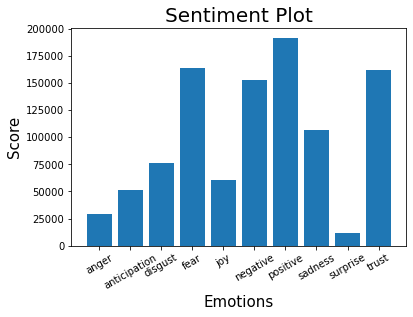

In [46]:
import matplotlib.pyplot as plt
import numpy as np
label = emotions
no_of_tweets = [anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust]

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, no_of_tweets)
    plt.xlabel('Emotions', fontsize=15)
    plt.ylabel('Score', fontsize=15)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Sentiment Plot',fontsize=20)
    plt.show()
plot_bar_x()

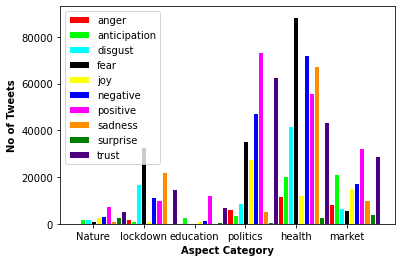

In [47]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = [anger_nature , anger_lockdown , anger_education , anger_politics , anger_health , anger_market]
bars2 = [anticipation_nature , anticipation_lockdown , anticipation_education , anticipation_politics , anticipation_health , anticipation_market]
bars3 = [disgust_nature , disgust_lockdown , disgust_education , disgust_politics , disgust_health , disgust_market]
bars4 = [fear_nature , fear_lockdown , fear_education , fear_politics , fear_health , fear_market]
bars5 = [joy_nature , joy_lockdown , joy_education , joy_politics , joy_health , joy_market]
bars6 = [negative_nature , negative_lockdown , negative_education , negative_politics , negative_health , negative_market]
bars7 = [positive_nature , positive_lockdown , positive_education , positive_politics , positive_health , positive_market]
bars8 = [sadness_nature , sadness_lockdown , sadness_education , sadness_politics , sadness_health , sadness_market]
bars9 = [surprise_nature , surprise_lockdown , surprise_education , surprise_politics , surprise_health , surprise_market]
bars10 = [trust_nature , trust_lockdown , trust_education , trust_politics , trust_health , trust_market]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]

# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='anger')
plt.bar(r2, bars2, color='lime', width=barWidth, edgecolor='white', label='anticipation')
plt.bar(r3, bars3, color='cyan', width=barWidth, edgecolor='white', label='disgust')
plt.bar(r4, bars4, color='black', width=barWidth, edgecolor='white', label='fear')
plt.bar(r5, bars5, color='yellow', width=barWidth, edgecolor='white', label='joy')
plt.bar(r6, bars6, color='blue', width=barWidth, edgecolor='white', label='negative')
plt.bar(r7, bars7, color='magenta', width=barWidth, edgecolor='white', label='positive')
plt.bar(r8, bars8, color='darkorange', width=barWidth, edgecolor='white', label='sadness')
plt.bar(r9, bars9, color='green', width=barWidth, edgecolor='white', label='surprise')
plt.bar(r10, bars10, color='indigo', width=barWidth, edgecolor='white', label='trust')
 
# Add xticks on the middle of the group bars
plt.xlabel('Aspect Category', fontweight='bold')
plt.ylabel('No of Tweets',fontweight='bold')
plt.xticks([r + 3*barWidth for r in range(0,6)], ['Nature', 'lockdown', 'education', 'politics', 'health' , 'market'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


# Without Positive And Negative

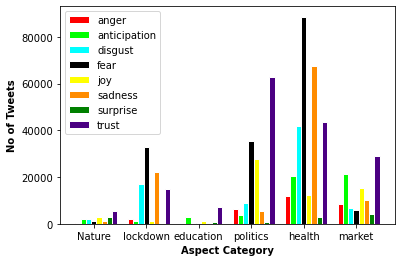

In [48]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.1
 
# set height of bar
bars1 = [anger_nature , anger_lockdown , anger_education , anger_politics , anger_health , anger_market]
bars2 = [anticipation_nature , anticipation_lockdown , anticipation_education , anticipation_politics , anticipation_health , anticipation_market]
bars3 = [disgust_nature , disgust_lockdown , disgust_education , disgust_politics , disgust_health , disgust_market]
bars4 = [fear_nature , fear_lockdown , fear_education , fear_politics , fear_health , fear_market]
bars5 = [joy_nature , joy_lockdown , joy_education , joy_politics , joy_health , joy_market]
bars8 = [sadness_nature , sadness_lockdown , sadness_education , sadness_politics , sadness_health , sadness_market]
bars9 = [surprise_nature , surprise_lockdown , surprise_education , surprise_politics , surprise_health , surprise_market]
bars10 = [trust_nature , trust_lockdown , trust_education , trust_politics , trust_health , trust_market]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r8 = [x + barWidth for x in r5]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]

# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='anger')
plt.bar(r2, bars2, color='lime', width=barWidth, edgecolor='white', label='anticipation')
plt.bar(r3, bars3, color='cyan', width=barWidth, edgecolor='white', label='disgust')
plt.bar(r4, bars4, color='black', width=barWidth, edgecolor='white', label='fear')
plt.bar(r5, bars5, color='yellow', width=barWidth, edgecolor='white', label='joy')
plt.bar(r8, bars8, color='darkorange', width=barWidth, edgecolor='white', label='sadness')
plt.bar(r9, bars9, color='green', width=barWidth, edgecolor='white', label='surprise')
plt.bar(r10, bars10, color='indigo', width=barWidth, edgecolor='white', label='trust')
 
# Add xticks on the middle of the group bars
plt.xlabel('Aspect Category', fontweight='bold')
plt.ylabel('No of Tweets',fontweight='bold')
plt.xticks([r + 3*barWidth for r in range(0,6)], ['Nature', 'lockdown', 'education', 'politics', 'health' , 'market'])

# Create legend & Show graphic
plt.legend()
plt.show()


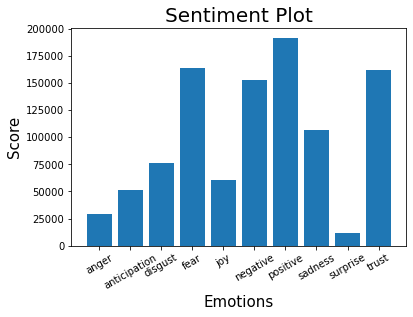

In [49]:
import matplotlib.pyplot as plt
import numpy as np
label = emotions
no_of_tweets = [anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust]

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, no_of_tweets)
    plt.xlabel('Emotions', fontsize=15)
    plt.ylabel('Score', fontsize=15)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Sentiment Plot',fontsize=20)
    plt.show()
plot_bar_x()

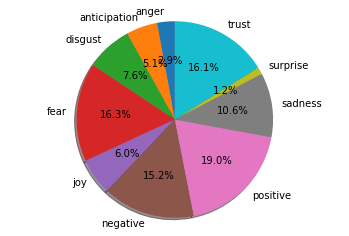

In [50]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust'
sizes = no_of_tweets
#explode = (0.2, 0.2, 0.2, 0.2,0.2,0.2,0.2,0.2,0.2,0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=None)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

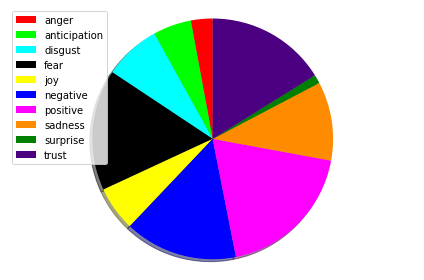

In [51]:
import matplotlib.pyplot as plt


labels = ['anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust']
sizes = no_of_tweets
colors = ['red','lime','cyan','black','yellow','blue','magenta','darkorange','green','indigo']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.savefig("Pie Chart of Emotion distribution.png")
plt.show()

# Positive Negative Remove


In [52]:
# Scoring System
anger_nature=0
anticipation_nature=0
disgust_nature=0
fear_nature=0
joy_nature=0
negative_nature=0
positive_nature=0
sadness_nature=0
surprise_nature=0
trust_nature=0

anger_lockdown=0
anticipation_lockdown=0
disgust_lockdown=0
fear_lockdown=0
joy_lockdown=0
negative_lockdown=0
positive_lockdown=0
sadness_lockdown=0
surprise_lockdown=0
trust_lockdown=0

anger_education=0
anticipation_education=0
disgust_education=0
fear_education=0
joy_education=0
negative_education=0
positive_education=0
sadness_education=0
surprise_education=0
trust_education=0

anger_politics=0
anticipation_politics=0
disgust_politics=0
fear_politics=0
joy_politics=0
negative_politics=0
positive_politics=0
sadness_politics=0
surprise_politics=0
trust_politics=0

anger_health=0
anticipation_health=0
disgust_health=0
fear_health=0
joy_health=0
negative_health=0
positive_health=0
sadness_health=0
surprise_health=0
trust_health=0

anger_market=0
anticipation_market=0
disgust_market=0
fear_market=0
joy_market=0
negative_market=0
positive_market=0
sadness_market=0
surprise_market=0
trust_market=0

for row in emolex_words.itertuples():
    for key,value in dictionary_nature.items():
        if row[1] in key:
            print(key)
            if (row.anger == 1):
                negative_nature += 1
            if (row.anticipation == 1):
                negative_nature += 1
            if (row.disgust == 1):
                negative_nature += 1
            if (row.fear == 1):
                negative_nature += 1
            if (row.joy == 1):
                positive_nature +=1
            if (row.negative == 1):
                negative_nature += 1
            if (row.positive == 1):
                positive_nature += 1
            if (row.sadness == 1):
                negative_nature += 1
            if (row.surprise == 1):
                positive_nature += 1
            if (row.trust == 1):
                positive_nature += 1
            
for row in emolex_words.itertuples():
    for key,value in dictionary_lockdown.items():
        if row[1] in key:
            print(key)
            if (row.anger == 1):
                negative_lockdown += 1
            if (row.anticipation == 1):
                negative_lockdown += 1
            if (row.disgust == 1):
                negative_lockdown += 1
            if (row.fear == 1):
                negative_lockdown += 1
            if (row.joy == 1):
                positive_lockdown +=1
            if (row.negative == 1):
                negative_lockdown += 1
            if (row.positive == 1):
                positive_lockdown += 1
            if (row.sadness == 1):
                negative_lockdown += 1
            if (row.surprise == 1):
                positive_lockdown += 1
            if (row.trust == 1):
                positive_lockdown += 1
                
for row in emolex_words.itertuples():
    for key,value in dictionary_education.items():
        if row[1] in key:
            print(key)
            if (row.anger == 1):
                negative_education += 1
            if (row.anticipation == 1):
                negative_education += 1
            if (row.disgust == 1):
                negative_education += 1
            if (row.fear == 1):
                negative_education += 1
            if (row.joy == 1):
                positive_education +=1
            if (row.negative == 1):
                negative_education += 1
            if (row.positive == 1):
                positive_education += 1
            if (row.sadness == 1):
                negative_education += 1
            if (row.surprise == 1):
                positive_education += 1
            if (row.trust == 1):
                positive_education += 1
            
for row in emolex_words.itertuples():
    for key,value in dictionary_politics.items():
        if row[1] in key:
            print(key)
            if (row.anger == 1):
                negative_politics += 1
            if (row.anticipation == 1):
                negative_politics += 1
            if (row.disgust == 1):
                negative_politics += 1
            if (row.fear == 1):
                negative_politics += 1
            if (row.joy == 1):
                positive_politics +=1
            if (row.negative == 1):
                negative_politics += 1
            if (row.positive == 1):
                positive_politics += 1
            if (row.sadness == 1):
                negative_politics += 1
            if (row.surprise == 1):
                positive_politics += 1
            if (row.trust == 1):
                positive_politics += 1
                
            
for row in emolex_words.itertuples():
    for key,value in dictionary_health.items():
        if row[1] in key:
            print(key)
            if (row.anger == 1):
                negative_health += 1
            if (row.anticipation == 1):
                negative_health += 1
            if (row.disgust == 1):
                negative_health += 1
            if (row.fear == 1):
                negative_health += 1
            if (row.joy == 1):
                positive_health +=1
            if (row.negative == 1):
                negative_health += 1
            if (row.positive == 1):
                positive_health += 1
            if (row.sadness == 1):
                negative_health += 1
            if (row.surprise == 1):
                positive_health += 1
            if (row.trust == 1):
                positive_health += 1

for row in emolex_words.itertuples():
    for key,value in dictionary_market.items():
        if row[1] in key:
            print(key)
            if (row.anger == 1):
                negative_market += 1
            if (row.anticipation == 1):
                negative_market += 1
            if (row.disgust == 1):
                negative_market += 1
            if (row.fear == 1):
                negative_market += 1
            if (row.joy == 1):
                positive_market += 1
            if (row.negative == 1):
                negative_market += 1
            if (row.positive == 1):
                positive_market += 1
            if (row.sadness == 1):
                negative_market += 1
            if (row.surprise == 1):
                positive_market += 1
            if (row.trust == 1):
                positive_market += 1


negative = negative_nature + negative_lockdown + negative_education + negative_politics + negative_health + negative_market
positive = positive_nature + positive_lockdown + positive_education + positive_politics + positive_health + positive_market


solace
cyclone
garden
habitat
heal
solace
land
cyclone
malign
manure
marine
marine
meadow
meandering
peacock
superior
pollution
pollute
pollute
pollution
salvation
sunshine
sky
snake
solace
solidarity
solidarity
soothing
soothe
soothe
soothing
sparkle
sparkle
sunny
sunshine
sunset
sun
sunny
sunset
sunshine
superior
failure
holiday
stray
incurable
insecure
incurable
failure
holiday
homesick
hospital
illegal
illegal
incurable
incurable
insecure
inspector
isolate
job
labor
isolate
illegal
failure
quarantine
homesick
hospital
starvation
starvation
stray
suicidal
suicide
coach
graduation
homework
institute
master
mentor
scholar
scholarship
scholarship
school
scholarship
study
study
teach
institute
university
mayor
censor
diplomacy
elect
gang
governor
government
govern
government
governor
safeguard
silly
majesty
majesty
major
majority
majority
mayor
nepotism
opposition
policy
politic
strategic
safeguard
safe
safeguard
salary
salute
scheme
seize
sense
senseless
senseless
sensibility
servant
s

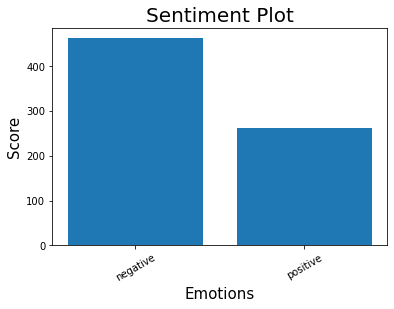

In [53]:
import matplotlib.pyplot as plt
import numpy as np
label = ['negative','positive']
no_of_tweets = [negative,positive]

def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, no_of_tweets)
    plt.xlabel('Emotions', fontsize=15)
    plt.ylabel('Score', fontsize=15)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Sentiment Plot',fontsize=20)
    
    plt.show()
plot_bar_x()

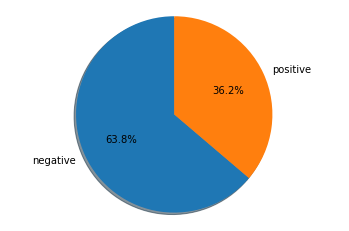

In [54]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'negative','positive'
sizes = no_of_tweets
#explode = (0.2, 0.2, 0.2, 0.2,0.2,0.2,0.2,0.2,0.2,0.2)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=None)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('Pie chart of Sentiments.png', dpi=300, bbox_inches='tight')
plt.show()